<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

This model will predict the price of a house at sale at Ames, Iowa by creating a linear regression model based on the Ames Housing Dataset. This will benefit potential buyers or sellers who are interested in the housing price of Ames because such data maybe not be as readily available as stock price due to its illiquidity (properties are infrequently traded). The model will be evaluated in term of R2 score in test dataset. A submission will be made to the Kaggle based on test.csv which will be evaluated in term of root mean squared error (RMSE). 


### Contents:

- [Data Import and Data Dictionary](#Data-Import-and-Data-Dictionary)
- [Exploratory Data Analysis and Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Findings](#Findings)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Import and Data Dictionary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import data files

df = pd.read_csv('datasets/train.csv')
#ori is original, used as reference when df is overwritten during cleaning
ori = pd.read_csv('datasets/train.csv')

In [3]:
#Display the data: print the first 5 rows of each dataframe and the shape of dataframe

print(df.shape)
df.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Data Dictionary

Please refer to Data Dictionary in this link - http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Exploratory Data Analysis and Cleaning


In [4]:
#Check for any missing values
#Display the data types of each feature.
df.info()
#check for any column that not in the correct data type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
#show columns with null values 
pd.set_option('display.max_rows', 85)
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

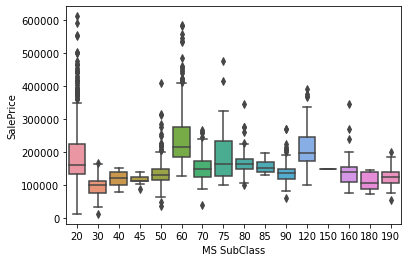

In [6]:
#check for outliers for selective columns
sns.boxplot(x = df["MS SubClass"], y = df["SalePrice"], data = df)

<AxesSubplot:xlabel='Mas Vnr Type', ylabel='SalePrice'>

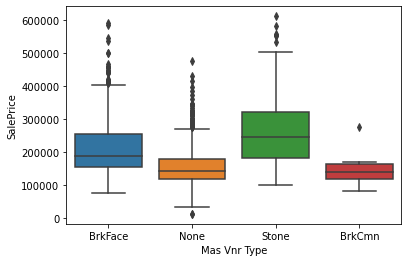

In [7]:
sns.boxplot(x = df["Mas Vnr Type"], y = df["SalePrice"], data = df)

Noted there are outliers in certain features. One of the possible ways to address outliers is to remove the values or change the values. However, this might distort the original information within the dataset, hence decided to leave the outliers unchanged. 

In [8]:
#clean data by imputing null values
# for null value in numerical columns, impute null values by mean. 
# for null value in categorical columns, impute null values by mode. 
df["Lot Frontage"] = df["Lot Frontage"].map(lambda x: df["Lot Frontage"].mean() if np.isnan(x) else x)

In [9]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].map(lambda x: df["Mas Vnr Type"].mode()[0] if pd.isnull(x) else x)

In [10]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].map(lambda x: df["Mas Vnr Area"].mean() if np.isnan(x) else x)

In [11]:
df["Alley"] = df["Alley"].map(lambda x: "No alley" if pd.isnull(x) else x)

In [12]:
df["Bsmt Qual"] = df["Bsmt Qual"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [13]:
df["Bsmt Cond"] = df["Bsmt Cond"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [14]:
df["Bsmt Exposure"] = df["Bsmt Exposure"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [15]:
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [16]:
df["BsmtFin SF 1"] = df["BsmtFin SF 1"].map(lambda x: df["BsmtFin SF 1"].mean() if np.isnan(x) else x)

In [17]:
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [18]:
df["BsmtFin SF 2"] = df["BsmtFin SF 2"].map(lambda x: df["BsmtFin SF 2"].mean() if np.isnan(x) else x)

In [19]:
df["Bsmt Unf SF"] = df["Bsmt Unf SF"].map(lambda x: df["Bsmt Unf SF"].mean() if np.isnan(x) else x)

In [20]:
df["Total Bsmt SF"] = df["Total Bsmt SF"].map(lambda x: df["Total Bsmt SF"].mean() if np.isnan(x) else x)

In [21]:
df["Bsmt Full Bath"] = df["Bsmt Full Bath"].map(lambda x: df["Bsmt Full Bath"].mode()[0] if pd.isnull(x) else x)

In [22]:
df["Bsmt Half Bath"] = df["Bsmt Half Bath"].map(lambda x: df["Bsmt Half Bath"].mode()[0] if pd.isnull(x) else x)

In [23]:
df["Fireplace Qu"] = df["Fireplace Qu"].map(lambda x: "No Fireplace" if pd.isnull(x) else x)

In [24]:
df["Garage Type"] = df["Garage Type"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [25]:
df["Garage Finish"] = df["Garage Finish"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [26]:
df["Garage Cars"] = df["Garage Cars"].map(lambda x: df["Garage Cars"].mode()[0] if pd.isnull(x) else x)

In [27]:
df["Garage Area"] = df["Garage Area"].map(lambda x: df["Garage Area"].mean() if np.isnan(x) else x)

In [28]:
df["Garage Qual"] = df["Garage Qual"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [29]:
df["Garage Cond"] = df["Garage Cond"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [30]:
df["Pool QC"] = df["Pool QC"].map(lambda x: "No Pool" if pd.isnull(x) else x)

In [31]:
df["Fence"] = df["Fence"].map(lambda x: "No Fence" if pd.isnull(x) else x)

In [32]:
df["Misc Feature"] = df["Misc Feature"].map(lambda x: "No Misc Feature" if pd.isnull(x) else x)

In [33]:
# compute the age of the building
df["Construction_Age"] = 2021 - df["Year Built"]

In [34]:
#check if there is any null value left
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley                 0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC      

In [35]:
#drop columns that are demmed not having high predictive power in determining sale price
df.drop(["Garage Yr Blt", "Id", 'PID', 'Year Built'], axis = 1, inplace=True)

In [36]:
#get all numerical columns to examine distribution of each numerical columns
numerical = df._get_numeric_data().columns

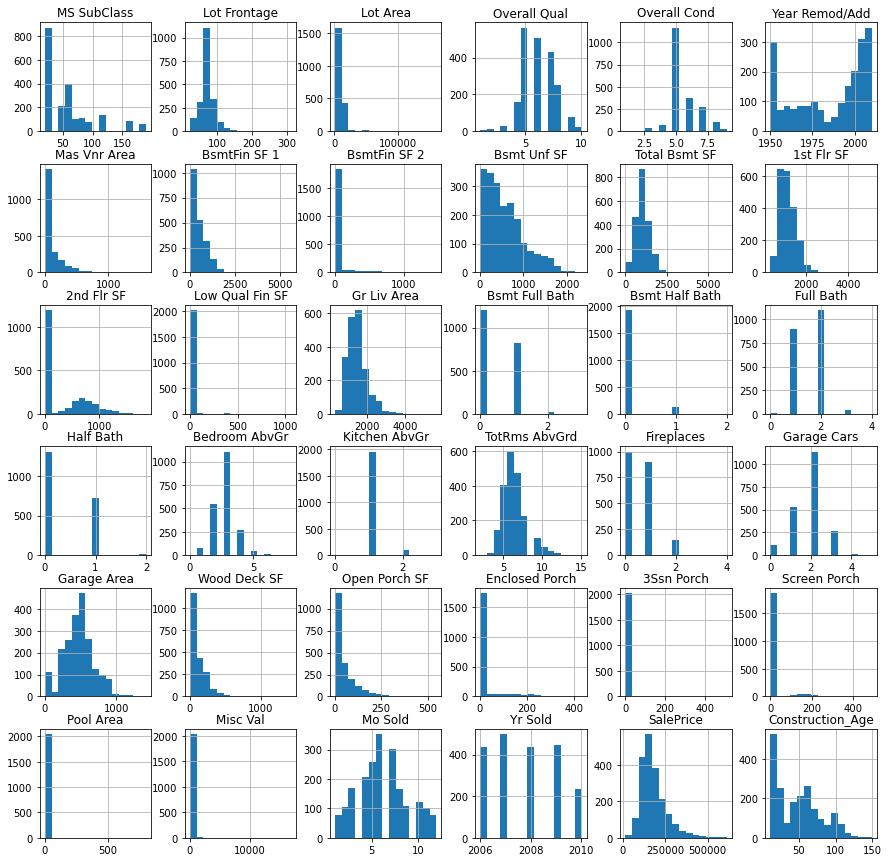

In [37]:
df[numerical].hist(bins = 15,figsize=(15,15));

Noted that most variables have skewed distributions, to check distribution of residuals when model is fit later. 

## Preprocessing and Modeling

In [38]:
# get all categorical variables to perform one-hot encoding
cat_col = [i for i in df.columns if df[i].dtypes == 'object']

In [39]:
# certain columns are numerical but categorical in nature, (eg. 20 and 30 refers to type of dwelling and does not give any meaning in numerical meaning. Hence should be dummified as well
cat_col.append("MS SubClass")

In [40]:
#perform one-hot encoding
df_dum = pd.get_dummies(df, columns = cat_col)

In [41]:
df_dum

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,69.0552,13517,6,8,2005,289.0,533.0,0.0,192.0,725.0,...,0,0,0,0,0,0,0,0,0,0
1,43.0000,11492,7,5,1997,132.0,637.0,0.0,276.0,913.0,...,0,0,0,0,0,0,0,0,0,0
2,68.0000,7922,5,7,2007,0.0,731.0,0.0,326.0,1057.0,...,0,0,0,0,0,0,0,0,0,0
3,73.0000,9802,5,5,2007,0.0,0.0,0.0,384.0,384.0,...,0,0,0,0,0,0,0,0,0,0
4,82.0000,14235,6,8,1993,0.0,0.0,0.0,676.0,676.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.0000,11449,8,5,2007,0.0,1011.0,0.0,873.0,1884.0,...,0,0,0,0,0,0,0,0,0,0
2047,69.0552,12342,4,5,1950,0.0,262.0,0.0,599.0,861.0,...,0,0,0,0,0,0,0,0,0,0
2048,57.0000,7558,6,6,1950,0.0,0.0,0.0,896.0,896.0,...,0,0,0,0,0,0,0,0,0,0
2049,80.0000,10400,4,5,1956,0.0,155.0,750.0,295.0,1200.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#construct target variable
y = df_dum["SalePrice"]

In [43]:
#construct features, i.e. predictive variables
X = df_dum.drop("SalePrice", axis = 1)

In [44]:
#split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [45]:
#check the test size is correctly assigned
print(len(X_train), len(X_test))

1640 411


In [46]:
#Instantiate standardscaler
ss = StandardScaler()

In [47]:
# fit and transform X_train data and transform the X_test data
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [48]:
#start to model
#Model 1 = Linear Regression (Base line model)
lr = LinearRegression()

In [49]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [50]:
print(lr.score(X_train_ss, y_train))
print(lr.score(X_test_ss, y_test))

0.9444773812374975
-1.8574463705169177e+23


Train R2 score is very high at around 94% but Test R2 score is very low (even negative), suggesting the linear regression model is severely overfitting. Regularisation by using Ridge or Lasso is required. 

In [51]:
#Model 2 = Ridge model 
r_alphas = np.logspace(-3,0,100)

In [52]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring="r2", cv=5).fit(X_train_ss, y_train)

In [53]:
print(ridge_cv.score(X_train_ss, y_train))
print(ridge_cv.score(X_test_ss, y_test))

0.9451774558046896
0.9235604342556687


Ridge model is significantly better than base line linear regression model. Both train and test score are very at more than 90%. Test score is slightly lower than train score which is expected given that the model has not seen train data before. 

In [54]:
#Try another regularisation model i.e. Lasso to see if it is better than Ridge model
#Model 3 = Lasso model
l_alphas = np.logspace(-3,0,100)

In [55]:
lasso_cv = LassoCV(alphas = l_alphas, cv = 5, max_iter=50000).fit(X_train_ss, y_train)

In [56]:
print(lasso_cv.score(X_train_ss, y_train))
print(lasso_cv.score(X_test_ss, y_test))

0.9451796402076038
0.9234389195183261


Both RidgeCV and LassoCV give similarly high train and test scores, which means both models are effective in reducing noise and multi-collinearity. I have decided to use Lasso for further analysis since Lasso removes certain features by reducing the features' coefficient into zero, which makes the model easier to be interpreted. 

## Findings



In [57]:
lasso_cv.coef_

array([ 2.49642245e+03,  5.81828906e+03,  8.50982522e+03,  6.08827154e+03,
        1.27355200e+03,  4.20753068e+03,  1.20046821e+04,  2.98999110e+03,
        2.68035977e+03,  8.78177261e+03,  1.25204658e+04,  1.66164770e+04,
        2.04428951e+02,  7.31278965e+03,  1.74620316e+03,  6.14878020e+02,
        1.53452276e+03,  7.45479957e+02, -3.43396589e+03, -2.39749521e+03,
        2.65372335e+03,  1.69739634e+03,  1.57820984e+03,  2.82634211e+03,
        1.00379116e+03,  4.07642119e+02,  7.23789023e+02,  5.43999640e+02,
        3.23510564e+03, -9.31645072e+03,  2.02152039e+02, -4.57427471e+02,
       -2.81842638e+02, -1.22615586e+04, -2.30355797e+03, -1.17152492e+03,
        1.28575161e+03,  0.00000000e+00,  6.05464661e+02,  0.00000000e+00,
       -2.44292872e+03, -9.18218817e+02,  1.52858996e-09,  4.58872778e+01,
       -0.00000000e+00, -8.03887017e+02, -1.34654280e+02,  1.83396013e+02,
       -5.70446092e+02,  0.00000000e+00,  1.42851478e+02,  2.14986238e+03,
       -1.07138216e+03, -

In [58]:
#pair each feature and its lasso coefficient for further analysis
lasso_coef = list(zip(df_dum,lasso_cv.coef_))

In [59]:
#export to data frame
lasso_coef = pd.DataFrame(lasso_coef)

In [60]:
lasso_coef.set_index(0, inplace=True)


In [61]:
lasso_coef.sort_values(1,ascending=False).head(10)

,1
0,
2nd Flr SF,16616.476989
1st Flr SF,12520.465839
BsmtFin SF 1,12004.682075
Total Bsmt SF,8781.772609
Overall Qual,8509.825215
Bsmt Qual_Gd,8146.707474
Gr Liv Area,7312.789646
Mas Vnr Type_Stone,6519.090227
Overall Cond,6088.271538


The top 10 highest predicting features in sale price are listed above. Higher coefficient means higher power in affecting price positively. Eg. for each unit increase in the feature "2nd Flr SF", the sale price will increase by $16,616. 

Noted that the top 4 are all related to size which indicate that sale price is highly correlated to building size. Other features, such as overall quality, Masonry Veneer Type or located in Somerset are also important factors in affecting sale price. 

In [62]:
#predict sale price and compare against true sale price to examine normality of error - one of the assumption of linear regression
y_pred = lasso_cv.predict(X_test_ss)

In [63]:
residuals = y_pred - y_test

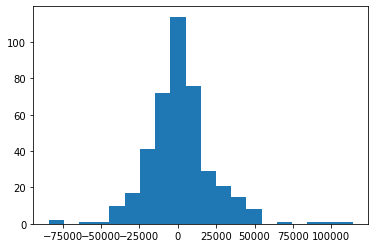

In [64]:
plt.hist(residuals, bins=20);

One of the underlying assumption for linear regression is normality of error. The mean of the residual is 0 and the shape of the histogram approximates a normal distribution, which indicates that the assumption of normality of error is not violated. 

## Conclusions and Recommendations

Property price is highly dependent on its size, be it basement size, first floor size or second floor size. 

1. Larger the size, higher the price. 

2. The overall material quality and condition of the house play a big part in improving sale price. 

3. Last but not least, houses located in Somerset are highly valued than other neighbourhood. 

## Bonus: Predicting sale price for Kaggle Challenge

In [65]:
test = pd.read_csv("datasets/test.csv")
test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [66]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [67]:
test["Lot Frontage"] = test["Lot Frontage"].map(lambda x: test["Lot Frontage"].mean() if np.isnan(x) else x)

In [68]:
test["Mas Vnr Type"] = test["Mas Vnr Type"].map(lambda x: test["Mas Vnr Type"].mode()[0] if pd.isnull(x) else x)

In [69]:
test["Mas Vnr Area"] = test["Mas Vnr Area"].map(lambda x: test["Mas Vnr Area"].mean() if np.isnan(x) else x)

In [70]:
test["Alley"] = test["Alley"].map(lambda x: "No alley" if pd.isnull(x) else x)

In [71]:
test["Bsmt Qual"] = test["Bsmt Qual"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [72]:
test["Bsmt Cond"] = test["Bsmt Cond"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [73]:
test["Bsmt Exposure"] = test["Bsmt Exposure"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [74]:
test["BsmtFin Type 1"] = test["BsmtFin Type 1"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [75]:
test["BsmtFin SF 1"] = test["BsmtFin SF 1"].map(lambda x: test["BsmtFin SF 1"].mean() if np.isnan(x) else x)

In [76]:
test["BsmtFin Type 2"] = test["BsmtFin Type 2"].map(lambda x: "No Basement" if pd.isnull(x) else x)

In [77]:
test["BsmtFin SF 2"] = test["BsmtFin SF 2"].map(lambda x: test["BsmtFin SF 2"].mean() if np.isnan(x) else x)

In [78]:
test["Bsmt Unf SF"] = test["Bsmt Unf SF"].map(lambda x: test["Bsmt Unf SF"].mean() if np.isnan(x) else x)

In [79]:
test["Total Bsmt SF"] = test["Total Bsmt SF"].map(lambda x: test["Total Bsmt SF"].mean() if np.isnan(x) else x)

In [80]:
test["Electrical"] = test["Electrical"].map(lambda x: test["Electrical"].mode()[0] if pd.isnull(x) else x)

In [81]:
test["Bsmt Full Bath"] = test["Bsmt Full Bath"].map(lambda x: test["Bsmt Full Bath"].mode()[0] if pd.isnull(x) else x)

In [82]:
test["Bsmt Half Bath"] = test["Bsmt Half Bath"].map(lambda x: test["Bsmt Half Bath"].mode()[0] if pd.isnull(x) else x)

In [83]:
test["Fireplace Qu"] = test["Fireplace Qu"].map(lambda x: "No Fireplace" if pd.isnull(x) else x)

In [84]:
test["Garage Type"] = test["Garage Type"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [85]:
test["Garage Finish"] = test["Garage Finish"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [86]:
test["Garage Cars"] = test["Garage Cars"].map(lambda x: test["Garage Cars"].mode()[0] if pd.isnull(x) else x)

In [87]:
test["Garage Area"] = test["Garage Area"].map(lambda x: test["Garage Area"].mean() if np.isnan(x) else x)

In [88]:
test["Garage Qual"] = test["Garage Qual"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [89]:
test["Garage Cond"] = test["Garage Cond"].map(lambda x: "No Garage" if pd.isnull(x) else x)

In [90]:
test["Pool QC"] = test["Pool QC"].map(lambda x: "No Pool" if pd.isnull(x) else x)

In [91]:
test["Fence"] = test["Fence"].map(lambda x: "No Fence" if pd.isnull(x) else x)

In [92]:
test["Misc Feature"] = test["Misc Feature"].map(lambda x: "No Misc Feature" if pd.isnull(x) else x)

In [93]:
test["Construction_Age"] = 2021 - test["Year Built"]

In [94]:
test.set_index('Id', inplace=True)

In [95]:
test.drop(["Garage Yr Blt", 'PID', 'Year Built'], axis = 1, inplace=True)

In [96]:
cat_col_test = [i for i in test.columns if df[i].dtypes == 'object']

In [97]:
cat_col_test.append("MS SubClass")

In [98]:
test_dum = pd.get_dummies(test, columns = cat_col_test)

In [99]:
X.columns.value_counts().sum()

317

In [100]:
test_dum.columns.value_counts().sum()

297

In [101]:
test_dum

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,6,8,1950,0.0,0,0,1020,1020,...,0,0,0,0,0,0,0,0,0,1
2718,69.545961,9662,5,4,1977,0.0,0,0,1967,1967,...,0,0,0,0,0,1,0,0,0,0
2414,58.000000,17104,7,5,2006,0.0,554,0,100,654,...,1,0,0,0,0,0,0,0,0,0
1989,60.000000,8520,5,6,2006,0.0,0,0,968,968,...,0,0,0,0,0,0,0,0,0,0
625,69.545961,9500,6,5,1963,247.0,609,0,785,1394,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,80.000000,8000,6,6,1974,0.0,931,153,0,1084,...,1,0,0,0,0,0,0,0,0,0
1234,90.000000,14670,6,7,1999,410.0,575,0,529,1104,...,1,0,0,0,0,0,0,0,0,0
1373,55.000000,8250,5,5,1968,0.0,250,492,210,952,...,0,0,0,0,0,0,0,0,0,0


In [102]:
missing_cols = set(X.columns) - set(test_dum.columns)

In [103]:
for c in missing_cols:
    test_dum[c] = 0

In [104]:
test_dum

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Heating_OthW,Pool QC_Gd,Electrical_Mix,Condition 2_RRAe,Condition 2_RRAn,Exterior 1st_Stone,Misc Feature_Elev,Misc Feature_TenC,Roof Matl_Membran,Condition 2_Artery
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,6,8,1950,0.0,0,0,1020,1020,...,0,0,0,0,0,0,0,0,0,0
2718,69.545961,9662,5,4,1977,0.0,0,0,1967,1967,...,0,0,0,0,0,0,0,0,0,0
2414,58.000000,17104,7,5,2006,0.0,554,0,100,654,...,0,0,0,0,0,0,0,0,0,0
1989,60.000000,8520,5,6,2006,0.0,0,0,968,968,...,0,0,0,0,0,0,0,0,0,0
625,69.545961,9500,6,5,1963,247.0,609,0,785,1394,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,80.000000,8000,6,6,1974,0.0,931,153,0,1084,...,0,0,0,0,0,0,0,0,0,0
1234,90.000000,14670,6,7,1999,410.0,575,0,529,1104,...,0,0,0,0,0,0,0,0,0,0
1373,55.000000,8250,5,5,1968,0.0,250,492,210,952,...,0,0,0,0,0,0,0,0,0,0


In [105]:
additional_cols = set(test_dum.columns) - set(X.columns)

In [106]:
additional_cols

{'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_Floor',
 'Kitchen Qual_Po',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [107]:
missing_cols

{'Bsmt Cond_Ex',
 'Bsmt Cond_Po',
 'Condition 2_Artery',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Electrical_Mix',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Ex',
 'Heating QC_Po',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_A (agr)',
 'Misc Feature_Elev',
 'Misc Feature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Pool QC_Fa',
 'Pool QC_Gd',
 'Roof Matl_ClyTile',
 'Roof Matl_Membran',
 'Utilities_NoSeWa'}

In [108]:
X

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,69.0552,13517,6,8,2005,289.0,533.0,0.0,192.0,725.0,...,0,0,0,0,0,0,0,0,0,0
1,43.0000,11492,7,5,1997,132.0,637.0,0.0,276.0,913.0,...,0,0,0,0,0,0,0,0,0,0
2,68.0000,7922,5,7,2007,0.0,731.0,0.0,326.0,1057.0,...,0,0,0,0,0,0,0,0,0,0
3,73.0000,9802,5,5,2007,0.0,0.0,0.0,384.0,384.0,...,0,0,0,0,0,0,0,0,0,0
4,82.0000,14235,6,8,1993,0.0,0.0,0.0,676.0,676.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.0000,11449,8,5,2007,0.0,1011.0,0.0,873.0,1884.0,...,0,0,0,0,0,0,0,0,0,0
2047,69.0552,12342,4,5,1950,0.0,262.0,0.0,599.0,861.0,...,0,0,0,0,0,0,0,0,0,0
2048,57.0000,7558,6,6,1950,0.0,0.0,0.0,896.0,896.0,...,0,0,0,0,0,0,0,0,0,0
2049,80.0000,10400,4,5,1956,0.0,155.0,750.0,295.0,1200.0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
test_dum

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Heating_OthW,Pool QC_Gd,Electrical_Mix,Condition 2_RRAe,Condition 2_RRAn,Exterior 1st_Stone,Misc Feature_Elev,Misc Feature_TenC,Roof Matl_Membran,Condition 2_Artery
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,6,8,1950,0.0,0,0,1020,1020,...,0,0,0,0,0,0,0,0,0,0
2718,69.545961,9662,5,4,1977,0.0,0,0,1967,1967,...,0,0,0,0,0,0,0,0,0,0
2414,58.000000,17104,7,5,2006,0.0,554,0,100,654,...,0,0,0,0,0,0,0,0,0,0
1989,60.000000,8520,5,6,2006,0.0,0,0,968,968,...,0,0,0,0,0,0,0,0,0,0
625,69.545961,9500,6,5,1963,247.0,609,0,785,1394,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,80.000000,8000,6,6,1974,0.0,931,153,0,1084,...,0,0,0,0,0,0,0,0,0,0
1234,90.000000,14670,6,7,1999,410.0,575,0,529,1104,...,0,0,0,0,0,0,0,0,0,0
1373,55.000000,8250,5,5,1968,0.0,250,492,210,952,...,0,0,0,0,0,0,0,0,0,0


In [110]:
test_dum.drop(additional_cols, axis = 1, inplace=True)

In [111]:
test_dum = test_dum[X.columns]

In [112]:
test_dum

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,6,8,1950,0.0,0,0,1020,1020,...,0,0,0,0,0,0,0,0,0,1
2718,69.545961,9662,5,4,1977,0.0,0,0,1967,1967,...,0,0,0,0,1,0,0,0,0,0
2414,58.000000,17104,7,5,2006,0.0,554,0,100,654,...,0,0,0,0,0,0,0,0,0,0
1989,60.000000,8520,5,6,2006,0.0,0,0,968,968,...,0,0,0,0,0,0,0,0,0,0
625,69.545961,9500,6,5,1963,247.0,609,0,785,1394,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,80.000000,8000,6,6,1974,0.0,931,153,0,1084,...,0,0,0,0,0,0,0,0,0,0
1234,90.000000,14670,6,7,1999,410.0,575,0,529,1104,...,0,0,0,0,0,0,0,0,0,0
1373,55.000000,8250,5,5,1968,0.0,250,492,210,952,...,0,0,0,0,0,0,0,0,0,0


In [113]:
test_dum_ss = ss.transform(test_dum)

In [114]:
test_dum_ss[0]

array([-1.68785243e-02, -1.52470173e-01, -8.17467500e-02,  2.21114876e+00,
       -1.63053850e+00, -5.70444305e-01, -9.55300507e-01, -2.80441654e-01,
        1.02144899e+00, -9.09676564e-02, -6.34349353e-01,  1.62132422e+00,
       -1.03338217e-01,  8.47751205e-01, -8.11177982e-01, -2.46005831e-01,
        7.60097241e-01, -7.43723918e-01,  1.41370577e+00,  4.77241576e+00,
        1.64869507e+00, -9.14720363e-01, -1.00646437e+00, -1.52074335e-01,
       -7.37950034e-01,  1.88060605e-01,  1.49420959e+00, -1.00084298e-01,
       -2.84324220e-01, -6.68651745e-02, -9.10698397e-02, -8.09937728e-01,
       -1.36183271e+00,  2.04723846e+00, -3.49428279e-02, -9.92583334e-02,
       -2.38119783e-01,  0.00000000e+00, -8.93877282e-02, -1.84945537e+00,
        2.34689934e+00, -5.53001264e-02,  5.53001264e-02,  4.73588127e+00,
       -3.59142104e+00, -1.73639724e-01, -7.17155559e-01, -1.58113883e-01,
       -7.00140042e-02,  7.64552852e-01, -2.01517089e-01, -2.09573542e-01,
       -1.47671438e-01,  

In [115]:
test_dum["SalePrice"] = lasso_cv.predict(test_dum_ss)

<ipython-input-115-258dd6cf107d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dum["SalePrice"] = lasso_cv.predict(test_dum_ss)


In [116]:
test_dum["SalePrice"].unique()

array([132287.54843552, 155277.02066721, 212451.12873441, 106681.51307266,
       171870.96236598,  81342.91725746, 105619.68962441, 148354.09787699,
       171319.10819064, 166321.11275857, 137032.31976047, 129415.66800449,
       146807.11515819, 269579.11016435, 137627.33359386, 118814.49423331,
       171655.29865363, 114525.02458619, 195700.8264501 , 158383.68478544,
       153531.72087868, 129106.89890442, 184336.09370501, 166596.7859449 ,
       176687.72050414, 117502.56699357, 112988.54945074, 118221.87277792,
       159309.85975826,  56923.14837123, 104698.72873478,  94800.96223971,
       174642.94383534, 150551.83979379, 204890.59466566, 184341.70410429,
       112871.96438712,  86402.9935007 , 106782.24679744, 182381.34578539,
       164471.73610894, 200847.63459591, 149297.07225724, 161799.17843951,
       200153.37063333,  98076.46247818, 209585.32899211, 128185.11044793,
       129870.41798293, 123457.15318441, 106519.17378131, 186806.24705244,
       229048.18685293, 1

In [117]:
ans3 = test_dum.reset_index()
ans3 = ans3.iloc[:,[0,-1]]


In [118]:
ans3

,Id,SalePrice
0,2658,132287.548436
1,2718,155277.020667
2,2414,212451.128734
3,1989,106681.513073
4,625,171870.962366
...,...,...
873,1662,200445.490233
874,1234,217976.297786
875,1373,120761.994028
876,1672,109967.189092



### References

Kaggle challenge - https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/submit
Data Dictionary - http://jse.amstat.org/v19n3/decock/DataDocumentation.txt